В текущем проекте будет произведен анализ криптовалют, а именно статистическое сопоставление биткоина и эфириума

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(suppress=True)

# Загрузка датасетов и приведение их к одной размерности по датам

Загрузим датасет биткоина

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BTC_DATASET = '/content/drive/My Drive/Мат статистика/BTC-USD.csv'
ETH_DATASET = '/content/drive/My Drive/Мат статистика/ETH-USD.csv'

In [5]:
btc_df = pd.read_csv(BTC_DATASET)
btc_df.head(1000)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
995,2017-06-08,2720.489990,2815.300049,2670.949951,2805.620117,2805.620117,1281170048
996,2017-06-09,2807.439941,2901.709961,2795.620117,2823.810059,2823.810059,1348950016
997,2017-06-10,2828.139893,2950.989990,2746.550049,2947.709961,2947.709961,2018889984
998,2017-06-11,2942.409912,2996.600098,2840.530029,2958.110107,2958.110107,1752400000


In [6]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [7]:
btc_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291
2746,2022-03-25,43958.675781,44982.519531,43711.871094,44395.964844,44395.964844,30379415552


Загрузим датасет эфириума

In [8]:
eth_df = pd.read_csv(ETH_DATASET)
eth_df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
95,2018-02-12,817.507996,875.937012,817.507996,868.706970,868.706970,2243450112
96,2018-02-13,869.293030,870.708984,828.836975,845.257996,845.257996,2081170048
97,2018-02-14,844.278992,926.429016,844.278992,923.560974,923.560974,2818370048
98,2018-02-15,923.728027,951.947998,911.111023,936.976013,936.976013,2900100096


In [9]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [10]:
eth_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166
1597,2022-03-25,3109.523438,3182.826660,3097.624268,3122.535889,3122.535889,16882068480


Так как последний элемент обоих датасетов заканчивается одной и той же датой, то путем нехитрых вычислений выясним какой кусок датасета биткоина надо отрезать

In [11]:
2746 - 1597

1149

In [12]:
btc_df[1149:]

,Date,Open,High,Low,Close,Adj Close,Volume
1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [13]:
btc_df = btc_df[1149:]

btc_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


In [14]:
btc_df.shape

(1598, 7)

In [15]:
eth_df.shape

(1598, 7)

# Статистический анализ биткоина


За основной показатель возьмем цену на закрытии биржи, кроме того интерес вызывает объем торгов(то есть volume), проанализируем основные статистические показатели.

Среднее значение:

In [16]:
mean_close = btc_df['Close'].sum() / btc_df['Close'].count()
mean_close

19359.002364138294

In [17]:
mean_volume = btc_df['Volume'].sum() / btc_df['Volume'].count()
mean_volume

25277843551.71339

Среднеквадратическое отклонение:

In [18]:
close_std = np.sqrt(((btc_df['Close'] - btc_df['Close'].mean()) ** 2).sum() / btc_df['Close'].count())
close_std

17780.779008190195

In [19]:
volume_std = np.sqrt(((btc_df['Volume'] - btc_df['Volume'].mean()) ** 2).sum() / btc_df['Volume'].count())
volume_std

20575824986.445522

In [20]:
btc_df['Close'].std(ddof=0), btc_df['Volume'].std(ddof=0)

(17780.779008190195, 20575824986.445522)

Дисперсия смещенная и несмещенная:

In [21]:
close_disp = ((btc_df['Close'] - btc_df['Close'].mean()) ** 2).sum() / btc_df['Close'].count()
close_disp

316156102.1380971

In [22]:
close_disp2 = ((btc_df['Close'] - btc_df['Close'].mean()) ** 2).sum() / (btc_df['Close'].count() - 1)
close_disp2

316354070.89334947

In [23]:
btc_df['Close'].var(ddof=0), btc_df['Close'].var(ddof=1)

(316156102.1380971, 316354070.89334947)

Теперь посмотрим основные статистические показатели:

In [24]:
btc_df['Close'].describe()

count     1598.000000
mean     19359.002364
std      17786.345068
min       3236.761719
25%       7277.131958
50%       9756.196778
75%      34641.250000
max      67566.828125
Name: Close, dtype: float64

In [25]:
btc_df['Close'].mode()

0    6741.75
dtype: float64

Итак, мы наблюдаем, что разброс между минимальным и максимальным значением весьма значительный, о чем и свидетельствует вышеупомянутое среднеквадратическое отклонение

Далее графически изобразим нашу выборку:

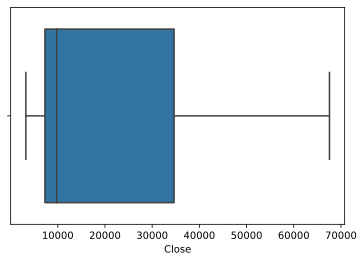

In [26]:
sns.boxplot(btc_df['Close'], orient = 'v')
plt.show()

In [27]:
btc_df['Close'].median()

9756.196777500001

Итак, на основе графического изображения и анализа медианного значения можно сделать вывод, что распределние в выборке не является нормальным распеределением

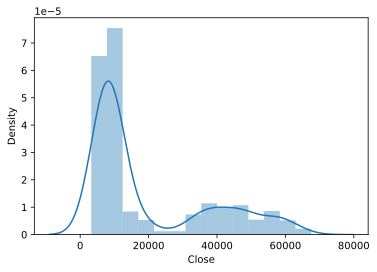

In [28]:
sns_plot = sns.distplot(btc_df['Close'])
fig = sns_plot.get_figure()

# Построение линейной регрессии между ценой на закрытии биткоина и эфириума

Проверим гипотезу, что зависимость хорошо восстанавливает результаты и расчитаем коэффициент детерминации

In [41]:
x1 = btc_df['Close']
y1 = eth_df['Close']

Найдем коэффиенты линейной регрессии

In [36]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean (y1)) / (np.mean (x1 ** 2) - np.mean(x1) ** 2)
b1

0.0018703239557052438

In [37]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

991.3472284483333

Мы получаем линейную регрессию вида: 

y = 991.3 + 0.002 * x

То есть ростом цен на биткоин, цена на эфириум увеличивактся на 0.002 доллара

Построим граффик:

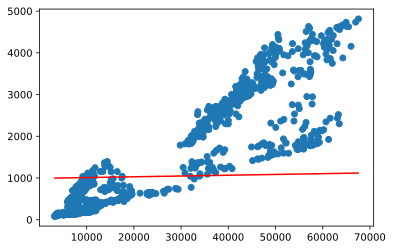

In [42]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

Соотвественно по оси y у нас расположен эфириум, а по оси x расположен биткоин, из-за значительного разброса ценовых значений линейная регрессия обретает нестандартный вид, однако все же зависимость наблюдается, хоть и незначительная

Теперь посчитаем коэффициент детерминации:

In [43]:
z1 = b0 + b1 * x1 

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: 0    320.884003
1    299.252991
2    314.681000
3    307.907990
4    316.716003
Name: Close, dtype: float64
pred: 1149    1004.708037
1150    1003.725294
1151    1003.238000
1152    1002.475787
1153    1003.615600
Name: Close, dtype: float64


In [44]:
R1 = z1.var() / y1.var()
R1

0.0007298098199906065

Данный показатель означает что лишь малая доля дисперсии y учитывается или объясняется моделью. Оставшиеся почти 100% объясняются другими факторами, которые модель не учитывала.

В таком случаю, важным будет посчитать среднюю ошибку апроксимации

In [45]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [46]:
mean_approximation_error(y1, z1)

0.5922222610277921

Так как полученный результат не входит в диапазон от 8 до 10%, то можно считать модель далеко не самой идельной и полученные показатели весьма размытыми

Проведем оценку значимости уравнения линейной регрессии

In [51]:
alpha = 0.5
k1 = 2 
k2 = x1.count() - k1 - 1
k2

1595

In [52]:
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

0.5824484080103125

In [50]:
F_crit = scipy.stats.f.ppf(1 - alpha, k1, k2)
F_crit

0.6934484923085212

Так как у нас показатель статистики T меньше значения F_crit, то уравнение регрессии по итогу статистически незначимо

# Проведем все те же операции с объемами на торгах

In [53]:
x1 = btc_df['Volume']
y1 = eth_df['Volume']

In [54]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean (y1)) / (np.mean (x1 ** 2) - np.mean(x1) ** 2)
b1

0.22380485036432238

In [55]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

6796161896.896685

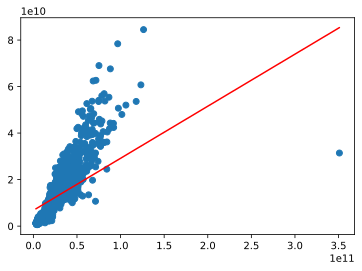

In [56]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

In [57]:
z1 = b0 + b1 * x1 

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: 0     893249984
1     885985984
2     842300992
3    1613479936
4    1041889984
Name: Volume, dtype: int64
pred: 1149    7.518212e+09
1150    7.961793e+09
1151    7.894748e+09
1152    8.800860e+09
1153    8.197908e+09
Name: Volume, dtype: float64


In [58]:
R1 = z1.var() / y1.var()
R1

0.16857315756683997

In [60]:
mean_approximation_error(y1, z1)

0.6083727809059911

In [64]:
alpha = 0.5
k1 = 2 
k2 = x1.count() - k1 - 1
k2

1595

In [65]:
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

161.69443455316699

In [63]:
F_crit = scipy.stats.f.ppf(1 - alpha, k1, k2)
F_crit

0.6934484923085212

На основе вышепроведенных вычисленний можно сделать вывод, что корреляцию между двумя криптовалютами лучше проводить по объемам торгов, а не цене, вероятно потому что объем торгов отображает волатильность криптовалюты. Кроме того, можно сделать вывод, что корреляции между этими двумя валютами все таки наблюдается, хоть и незначительная.

Проведем также однофакторный анализ объема торгов по биткоину и эфириуму

In [66]:
y1 = btc_df['Volume']
y2 = eth_df['Volume']

n1 = y1.shape[0]
n2 = y2.shape[0] 

In [67]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(25277843551.71339, 12453465890.52065)

Видно что среднее значение объема торгов значительно отличается (практически в 2 раза)

In [68]:
y = np.concatenate([y1, y2])

print(y)

[ 3226249984  5208249856  4908680192 ... 16008767658 18070503166
 16882068480]


In [69]:
y_mean = y.mean()
y_mean

18865654721.11702

In [71]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_F, S2_res

(1.3140726525512258e+23, 8.775577869475138e+23)

In [72]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

False

In [73]:
S2_F + S2_res

1.0089650522026364e+24

In [74]:
((y - y_mean) ** 2).sum()

1.0089650522026367e+24

Разница незначительная, соответственно можно считать, что вычисления проведены верно и продолжать:

In [75]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(1.3140726525512258e+23, 2.7475196836177638e+20)

Итак значение статистики T:

In [76]:
T = sigma2_F / sigma2_res
T

478.27597392166314

И F_crit:

In [78]:
alpha = 0.05

F_crit = scipy.stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.8443718953881114

Видим, что  T>Fcrit , поэтому заключаем, что отличие средних объемов торгов по криптовалютам действительно является статистически значимым.